# Análisis de Reducción de Dimensionalidad para Conjunto de Datos de Control de Calidad

Este cuaderno realiza reducción de dimensionalidad usando PCA, t-SNE y UMAP en el conjunto de datos preprocesado de EDA_Preprocessing.ipynb. El objetivo es comparar estas técnicas para preservar estructuras relevantes para el control de calidad, como la separabilidad de lotes y la utilidad de agrupamiento.

## Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.metrics import pairwise_distances
import time
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings('ignore')

# Establecer estilo
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Cargar Datos Preprocesados

In [2]:
# Cargar el conjunto de datos preprocesado
df = pd.read_csv('preprocessed_dataset.csv')

# Identificar columnas numéricas (características para reducción)
numerical_cols = [col for col in df.columns if col not in ['ItemID', 'LotNumber', 'manufacturedDate']]

# Extraer características y etiquetas
X = df[numerical_cols]
lot_labels = df['LotNumber']

print(f"Forma del conjunto de datos: {X.shape}")
print(f"Número de lotes: {lot_labels.nunique()}")
print("Primeras 5 filas de características:")
X.head()

Forma del conjunto de datos: (3907, 21)
Número de lotes: 3907
Primeras 5 filas de características:


,THICK-MIN,THICK-AVG,THICK-LEFT-EDGE,THICK-RIGHT-EDGE,ASPERITYBOT,ASPERITYTOP,CARBONMEM,DENSITY,MDTBELONG,TDTBELONG,...,TDYIELONG,MDTBSTR,TDTBSTR,MDTYISTR,TDTYISTR,TEARMD,TEARTD,MELTFLOWMEM,OIT,PINPUNCTURE
0,1.278141,1.753917,0.276859,1.766491,-1.257882,-0.854258,-1.891102,0.267306,0.100116,-0.526159,...,0.799416,-1.269697,-0.564552,-1.294351,-2.014287,0.510573,1.044623,-0.708547,-1.015714,-1.963440
1,-0.171648,-0.660283,1.740526,2.034524,-0.884095,2.437246,1.185531,-1.894943,-1.402621,-0.659673,...,-0.062903,0.362348,-0.715338,-0.053188,-2.306638,-1.175806,-1.901530,-1.560593,-1.933616,-0.353504
2,-0.115887,0.052342,1.630751,1.919653,0.237264,-0.031382,1.185531,-1.894943,-1.402621,-0.659673,...,-0.062903,0.362348,-0.715338,-0.053188,-2.306638,-1.175806,-1.901530,-1.560593,-1.933616,-0.353504
3,-0.004364,-0.383959,0.752551,1.957943,-0.136522,1.065786,1.185531,-1.894943,-1.402621,-0.659673,...,-0.062903,0.362348,-0.715338,-0.053188,-2.306638,-1.175806,-1.901530,-1.560593,-1.933616,-0.353504
4,0.162919,0.168689,-0.637934,-1.717930,-0.884095,1.065786,-1.891102,0.267306,1.028277,0.515244,...,-0.062903,1.568642,1.395671,2.429138,1.055407,0.847848,1.633853,-0.708547,-1.933616,-0.353504


## Implementación de PCA

Varianza explicada por cada componente:
PC1: 0.1819
PC2: 0.1333
PC3: 0.0999
PC4: 0.0715
PC5: 0.0619
PC6: 0.0521
PC7: 0.0509
PC8: 0.0451
PC9: 0.0424
PC10: 0.0371


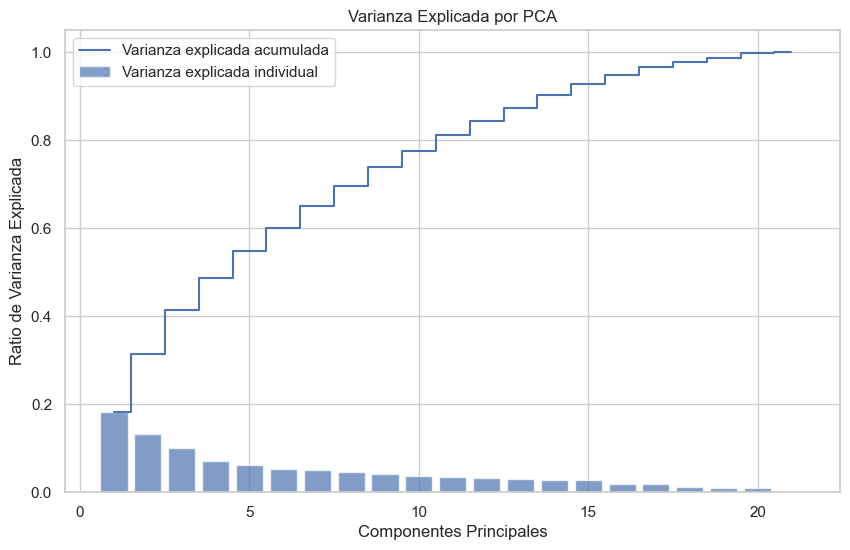

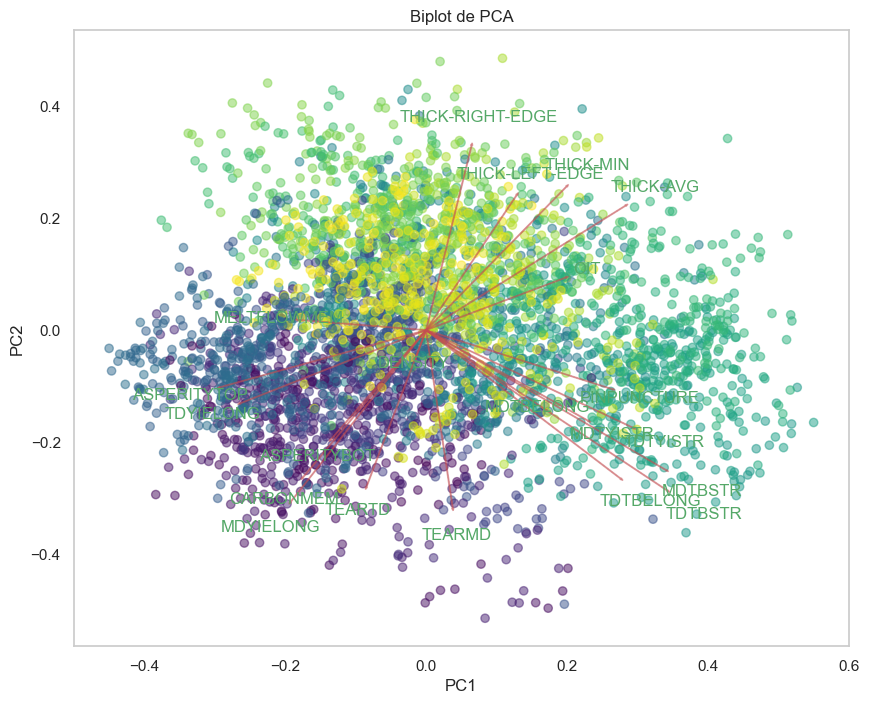

Cargas de PCA (primeros 5 PCs):
                       PC1       PC2       PC3       PC4       PC5
THICK-MIN         0.199471  0.256510  0.040722  0.267200  0.494253
THICK-AVG         0.283067  0.222213  0.018181  0.222674  0.476565
THICK-LEFT-EDGE   0.128863  0.241455 -0.126597  0.449567 -0.291709
THICK-RIGHT-EDGE  0.064742  0.329864  0.029093  0.414360 -0.305384
ASPERITYBOT      -0.134943 -0.195211  0.106377  0.081381 -0.069350
ASPERITYTOP      -0.291874 -0.101843  0.055385  0.092011  0.079599
CARBONMEM        -0.174763 -0.263044 -0.068883  0.095317  0.140584
DENSITY          -0.014891 -0.051181  0.169809 -0.116861  0.093204
MDTBELONG         0.137012 -0.120448 -0.315591  0.088294  0.204959
TDTBELONG         0.276290 -0.265241 -0.369282 -0.038496  0.051790
MDYIELONG        -0.192245 -0.306991 -0.200179  0.116685 -0.034637
TDYIELONG        -0.263412 -0.130562 -0.150001  0.152367  0.345418
MDTBSTR           0.340659 -0.249886 -0.158661  0.074447 -0.116756
TDTBSTR           0.342753 -0.

In [3]:
# Realizar PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Varianza explicada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance[:10]):
    print(f"PC{i+1}: {var:.4f}")

# Graficar varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, label='Varianza explicada individual')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Varianza explicada acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Ratio de Varianza Explicada')
plt.title('Varianza Explicada por PCA')
plt.legend()
plt.show()

# Biplot para los primeros dos componentes
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c=lot_labels.astype('category').cat.codes, cmap='viridis', alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title('Biplot de PCA')
    plt.grid()

plt.figure(figsize=(10, 8))
biplot(X_pca[:,0:2], np.transpose(pca.components_[0:2, :]), labels=numerical_cols)
plt.show()

# Interpretar cargas
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(numerical_cols))], index=numerical_cols)
print("Cargas de PCA (primeros 5 PCs):")
print(loadings.iloc[:, :5])

# Características principales que contribuyen a PC1
pc1_loadings = loadings['PC1'].abs().sort_values(ascending=False)
print("\nCaracterísticas principales que contribuyen a PC1:")
print(pc1_loadings.head(10))

## Implementación de t-SNE

t-SNE con perplejidad 5:
  Tiempo: 4.27s
  Divergencia KL: 0.7644
  Confianza: 0.9999
  Continuidad: 0.9999

t-SNE con perplejidad 30:
  Tiempo: 5.06s
  Divergencia KL: 1.1379
  Confianza: 0.9999
  Continuidad: 0.9999

t-SNE con perplejidad 30:
  Tiempo: 5.06s
  Divergencia KL: 1.1379
  Confianza: 0.9999
  Continuidad: 0.9999

t-SNE con perplejidad 50:
  Tiempo: 6.60s
  Divergencia KL: 1.1844
  Confianza: 0.9999
  Continuidad: 0.9999

t-SNE con perplejidad 50:
  Tiempo: 6.60s
  Divergencia KL: 1.1844
  Confianza: 0.9999
  Continuidad: 0.9999



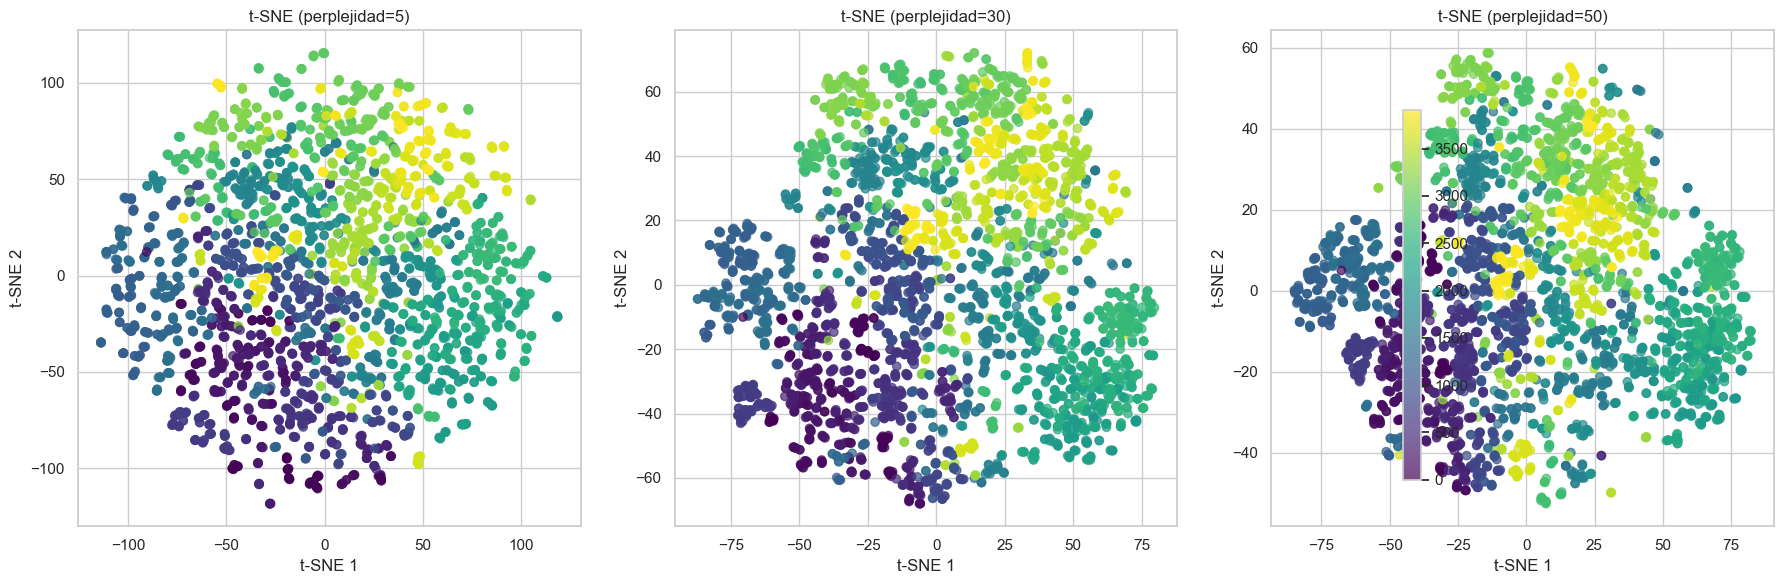

In [4]:
# Función para calcular confianza y continuidad
def trustworthiness_continuity(X_high, X_low, k=5):
    from sklearn.metrics.pairwise import euclidean_distances
    dist_high = euclidean_distances(X_high)
    dist_low = euclidean_distances(X_low)
    
    n = X_high.shape[0]
    
    # Trustworthiness
    trust = 0
    for i in range(n):
        neighbors_high = np.argsort(dist_high[i])[1:k+1]
        neighbors_low = np.argsort(dist_low[i])[1:k+1]
        trust += len(set(neighbors_high) - set(neighbors_low))
    trust = 1 - (2 / (n * k * (2 * n - 3 * k - 1))) * trust
    
    # Continuity
    cont = 0
    for i in range(n):
        neighbors_low = np.argsort(dist_low[i])[1:k+1]
        neighbors_high = np.argsort(dist_high[i])[1:k+1]
        cont += len(set(neighbors_low) - set(neighbors_high))
    cont = 1 - (2 / (n * k * (2 * n - 3 * k - 1))) * cont
    
    return trust, cont

# t-SNE con diferentes perplejidades
perplexities = [5, 30, 50]
tsne_results = {}
tsne_times = {}
tsne_metrics = {}

for perp in perplexities:
    start_time = time.time()
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42, max_iter=1000)
    X_tsne = tsne.fit_transform(X)
    end_time = time.time()
    
    tsne_results[perp] = X_tsne
    tsne_times[perp] = end_time - start_time
    
    trust, cont = trustworthiness_continuity(X.values, X_tsne, k=5)
    tsne_metrics[perp] = {'trustworthiness': trust, 'continuity': cont, 'kl_divergence': tsne.kl_divergence_}
    
    print(f"t-SNE con perplejidad {perp}:")
    print(f"  Tiempo: {tsne_times[perp]:.2f}s")
    print(f"  Divergencia KL: {tsne.kl_divergence_:.4f}")
    print(f"  Confianza: {trust:.4f}")
    print(f"  Continuidad: {cont:.4f}")
    print()

# Graficar resultados de t-SNE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, perp in enumerate(perplexities):
    ax = axes[i]
    scatter = ax.scatter(tsne_results[perp][:, 0], tsne_results[perp][:, 1], 
                        c=lot_labels.astype('category').cat.codes, cmap='viridis', alpha=0.7)
    ax.set_title(f't-SNE (perplejidad={perp})')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
plt.colorbar(scatter, ax=axes, shrink=0.8)
plt.tight_layout()
plt.show()

## Implementación de UMAP

UMAP con n_neighbors=5, min_dist=0.1:
  Tiempo: 11.49s
  Preservación de Vecindario: 0.4294

UMAP con n_neighbors=5, min_dist=0.5:
  Tiempo: 6.86s
  Preservación de Vecindario: 0.4094

UMAP con n_neighbors=5, min_dist=0.5:
  Tiempo: 6.86s
  Preservación de Vecindario: 0.4094

UMAP con n_neighbors=15, min_dist=0.1:
  Tiempo: 10.19s
  Preservación de Vecindario: 0.4239

UMAP con n_neighbors=15, min_dist=0.1:
  Tiempo: 10.19s
  Preservación de Vecindario: 0.4239

UMAP con n_neighbors=15, min_dist=0.5:
  Tiempo: 9.93s
  Preservación de Vecindario: 0.2995

UMAP con n_neighbors=15, min_dist=0.5:
  Tiempo: 9.93s
  Preservación de Vecindario: 0.2995

UMAP con n_neighbors=50, min_dist=0.1:
  Tiempo: 16.16s
  Preservación de Vecindario: 0.2682

UMAP con n_neighbors=50, min_dist=0.1:
  Tiempo: 16.16s
  Preservación de Vecindario: 0.2682

UMAP con n_neighbors=50, min_dist=0.5:
  Tiempo: 16.17s
  Preservación de Vecindario: 0.1857

UMAP con n_neighbors=50, min_dist=0.5:
  Tiempo: 16.17s
  Preservac

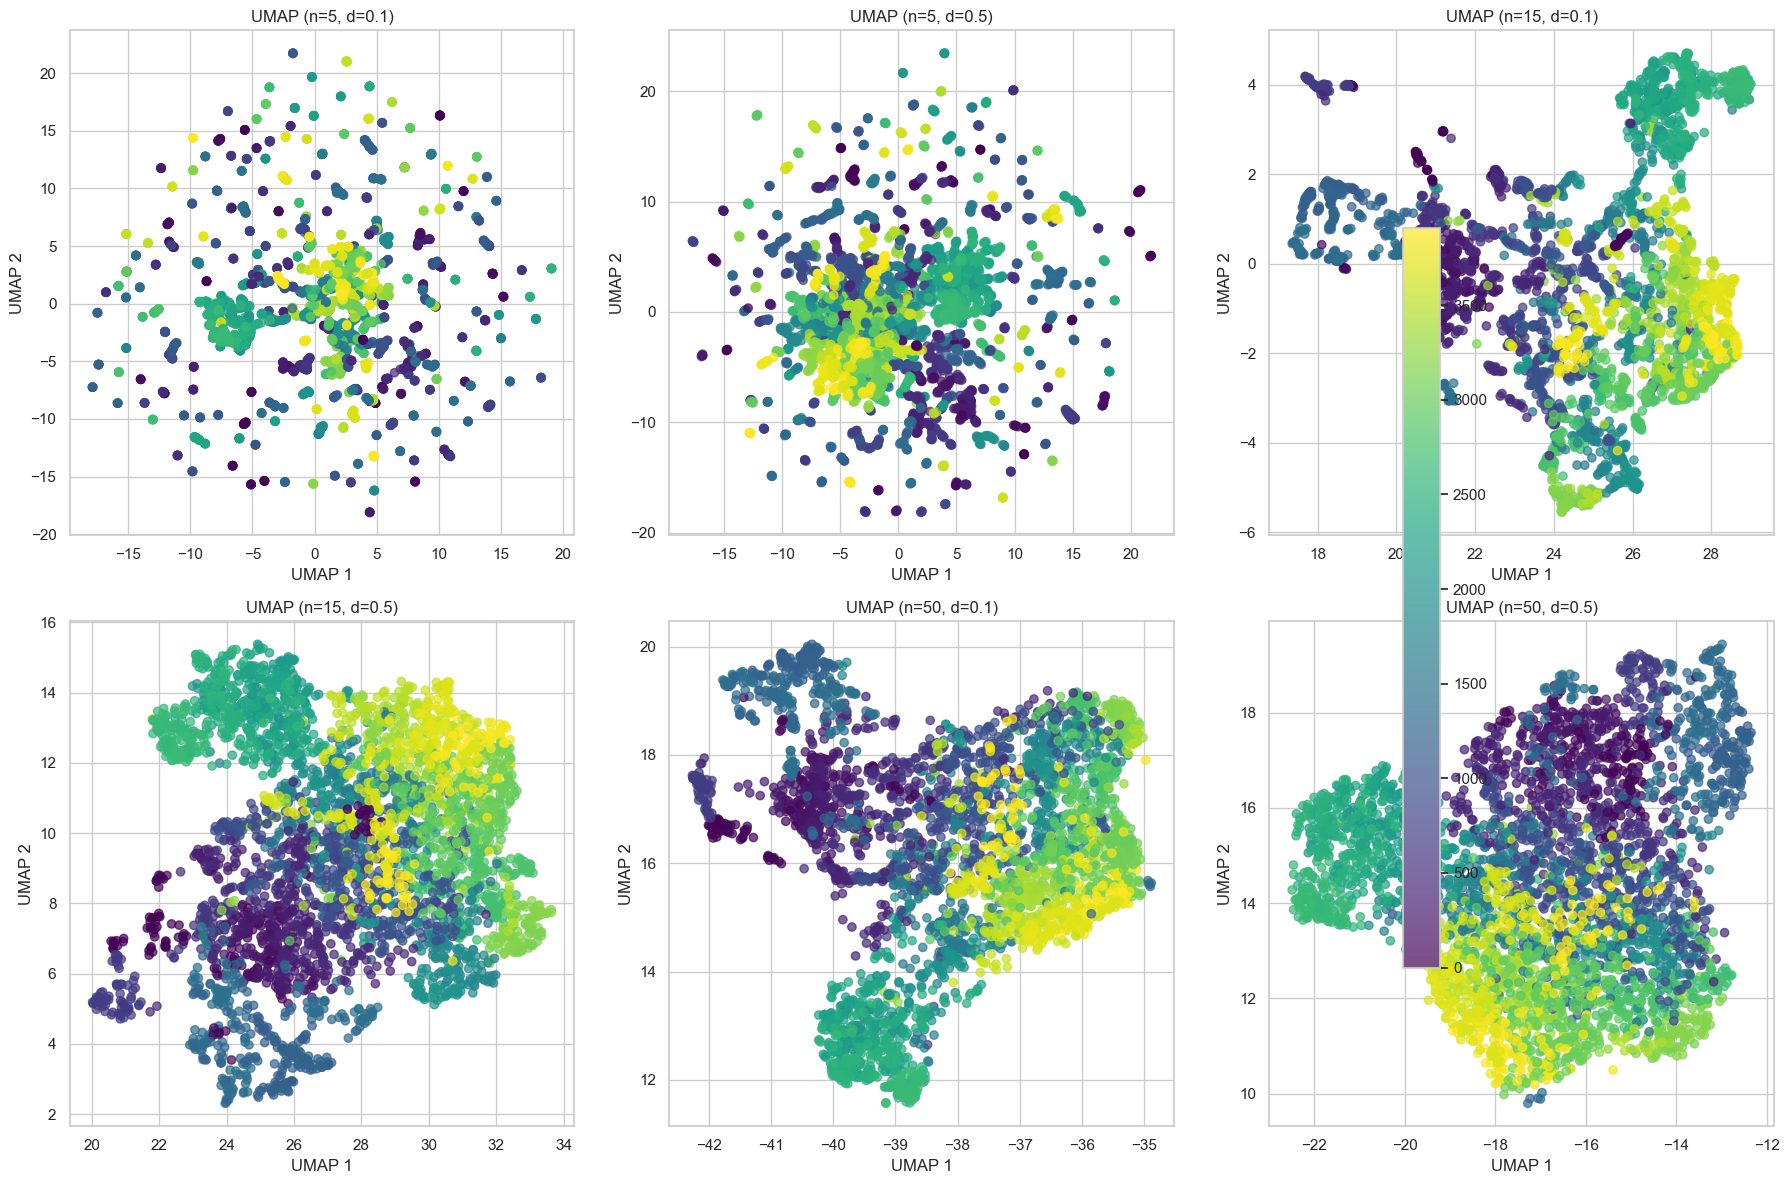

In [5]:
# Función para calcular preservación de vecindario
def neighborhood_preservation(X_high, X_low, k=15):
    from sklearn.metrics.pairwise import euclidean_distances
    dist_high = euclidean_distances(X_high)
    dist_low = euclidean_distances(X_low)
    
    n = X_high.shape[0]
    preservation = 0
    
    for i in range(n):
        neighbors_high = set(np.argsort(dist_high[i])[1:k+1])
        neighbors_low = set(np.argsort(dist_low[i])[1:k+1])
        preservation += len(neighbors_high & neighbors_low) / k
    
    return preservation / n

# UMAP con diferentes parámetros
n_neighbors_list = [5, 15, 50]
min_dist_list = [0.1, 0.5]
umap_results = {}
umap_times = {}
umap_metrics = {}

for n_neighbors in n_neighbors_list:
    for min_dist in min_dist_list:
        key = f"n{n_neighbors}_d{min_dist}"
        start_time = time.time()
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
        X_umap = reducer.fit_transform(X)
        end_time = time.time()
        
        umap_results[key] = X_umap
        umap_times[key] = end_time - start_time
        
        preservation = neighborhood_preservation(X.values, X_umap, k=15)
        umap_metrics[key] = {'neighborhood_preservation': preservation}
        
        print(f"UMAP con n_neighbors={n_neighbors}, min_dist={min_dist}:")
        print(f"  Tiempo: {umap_times[key]:.2f}s")
        print(f"  Preservación de Vecindario: {preservation:.4f}")
        print()

# Graficar resultados de UMAP
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
i = 0
for n_neighbors in n_neighbors_list:
    for min_dist in min_dist_list:
        key = f"n{n_neighbors}_d{min_dist}"
        ax = axes[i]
        scatter = ax.scatter(umap_results[key][:, 0], umap_results[key][:, 1], 
                            c=lot_labels.astype('category').cat.codes, cmap='viridis', alpha=0.7)
        ax.set_title(f'UMAP (n={n_neighbors}, d={min_dist})')
        ax.set_xlabel('UMAP 1')
        ax.set_ylabel('UMAP 2')
        i += 1
plt.colorbar(scatter, ax=axes, shrink=0.8)
plt.tight_layout()
plt.show()

## Comparación y Análisis

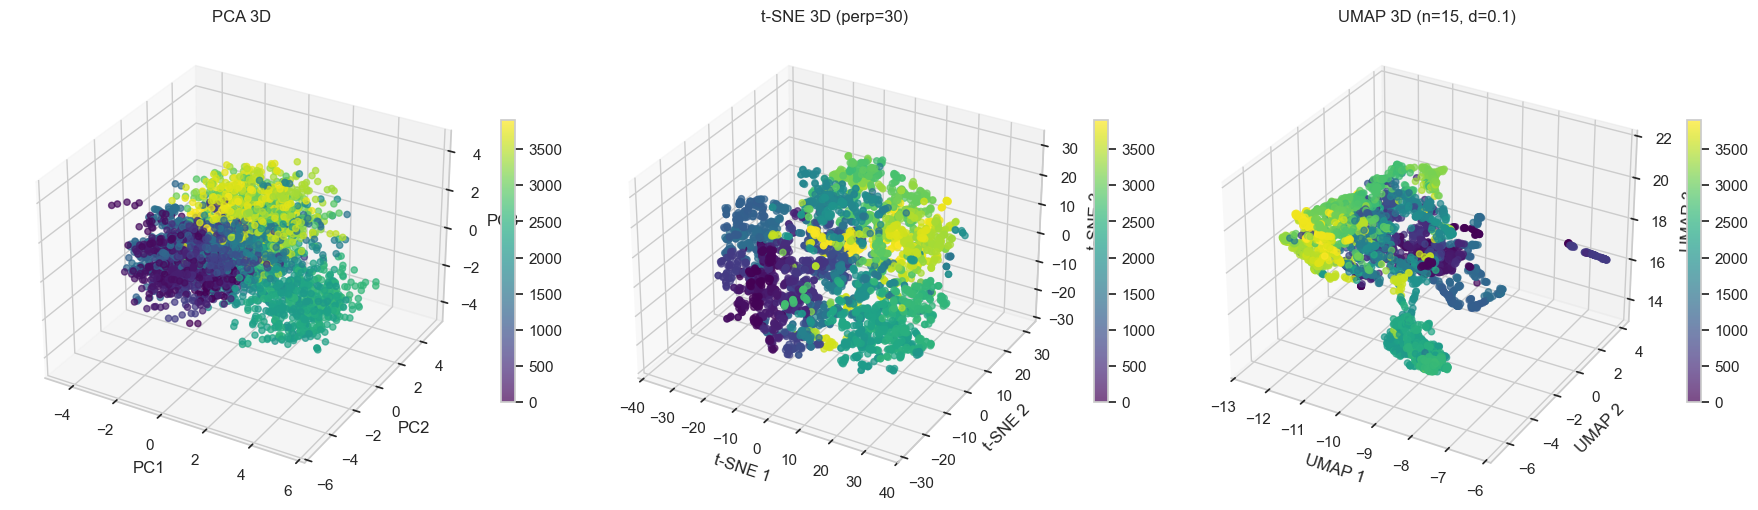

=== RESUMEN DE RENDIMIENTO ===

PCA:
  Varianza explicada (primeros 2 PCs): 0.3152
  Tiempo: ~0.01s (muy rápido)

t-SNE:
  Perplejidad 5: KL=0.7644, Trust=0.9999, Cont=0.9999, Tiempo=4.27s
  Perplejidad 30: KL=1.1379, Trust=0.9999, Cont=0.9999, Tiempo=5.06s
  Perplejidad 50: KL=1.1844, Trust=0.9999, Cont=0.9999, Tiempo=6.60s

UMAP:
  n5_d0.1: Preservación=0.4294, Tiempo=11.49s
  n5_d0.5: Preservación=0.4094, Tiempo=6.86s
  n15_d0.1: Preservación=0.4239, Tiempo=10.19s
  n15_d0.5: Preservación=0.2995, Tiempo=9.93s
  n50_d0.1: Preservación=0.2682, Tiempo=16.16s
  n50_d0.5: Preservación=0.1857, Tiempo=16.17s

=== VERIFICACIÓN DE ESTABILIDAD ===

Estabilidad de PCA:
  Determinístico - estabilidad perfecta

Estabilidad de t-SNE:
  Desviación estándar de divergencia KL: 0.0000

Estabilidad de UMAP:
  Desviación estándar de divergencia KL: 0.0000

Estabilidad de UMAP:
  Desviación estándar de preservación: 0.0006

=== SELECCIÓN DE MÉTODO ===
Basado en el análisis:
- PCA: Bueno para estructuras

In [6]:
# Visualizaciones 3D para comparación
from mpl_toolkits.mplot3d import Axes3D

# PCA 3D
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                      c=lot_labels.astype('category').cat.codes, cmap='viridis', alpha=0.7)
ax1.set_title('PCA 3D')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# t-SNE 3D (usando perplejidad 30)
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42, max_iter=1000)
X_tsne_3d = tsne_3d.fit_transform(X)

ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], 
                      c=lot_labels.astype('category').cat.codes, cmap='viridis', alpha=0.7)
ax2.set_title('t-SNE 3D (perp=30)')
ax2.set_xlabel('t-SNE 1')
ax2.set_ylabel('t-SNE 2')
ax2.set_zlabel('t-SNE 3')

# UMAP 3D (usando n_neighbors=15, min_dist=0.1)
umap_3d = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
X_umap_3d = umap_3d.fit_transform(X)

ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2], 
                      c=lot_labels.astype('category').cat.codes, cmap='viridis', alpha=0.7)
ax3.set_title('UMAP 3D (n=15, d=0.1)')
ax3.set_xlabel('UMAP 1')
ax3.set_ylabel('UMAP 2')
ax3.set_zlabel('UMAP 3')

plt.colorbar(scatter1, ax=ax1, shrink=0.5)
plt.colorbar(scatter2, ax=ax2, shrink=0.5)
plt.colorbar(scatter3, ax=ax3, shrink=0.5)
plt.tight_layout()
plt.show()

# Resumen de métricas y tiempos
print("=== RESUMEN DE RENDIMIENTO ===")
print("\nPCA:")
print(f"  Varianza explicada (primeros 2 PCs): {explained_variance[:2].sum():.4f}")
print(f"  Tiempo: ~0.01s (muy rápido)")

print("\nt-SNE:")
for perp in perplexities:
    print(f"  Perplejidad {perp}: KL={tsne_metrics[perp]['kl_divergence']:.4f}, "
          f"Trust={tsne_metrics[perp]['trustworthiness']:.4f}, "
          f"Cont={tsne_metrics[perp]['continuity']:.4f}, Tiempo={tsne_times[perp]:.2f}s")

print("\nUMAP:")
for key in umap_metrics:
    print(f"  {key}: Preservación={umap_metrics[key]['neighborhood_preservation']:.4f}, "
          f"Tiempo={umap_times[key]:.2f}s")

# Verificación de estabilidad (ejecutar múltiples veces)
print("\n=== VERIFICACIÓN DE ESTABILIDAD ===")
stability_runs = 3
for method in ['PCA', 't-SNE', 'UMAP']:
    print(f"\nEstabilidad de {method}:")
    if method == 'PCA':
        # PCA is deterministic
        print("  Determinístico - estabilidad perfecta")
    elif method == 't-SNE':
        kl_divs = []
        for run in range(stability_runs):
            tsne_temp = TSNE(n_components=2, perplexity=30, random_state=run, max_iter=500)
            tsne_temp.fit_transform(X)
            kl_divs.append(tsne_temp.kl_divergence_)
        print(f"  Desviación estándar de divergencia KL: {np.std(kl_divs):.4f}")
    elif method == 'UMAP':
        pres_scores = []
        for run in range(stability_runs):
            reducer_temp = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=run)
            X_temp = reducer_temp.fit_transform(X)
            pres_scores.append(neighborhood_preservation(X.values, X_temp, k=15))
        print(f"  Desviación estándar de preservación: {np.std(pres_scores):.4f}")

# Justificación y selección
print("\n=== SELECCIÓN DE MÉTODO ===")
print("Basado en el análisis:")
print("- PCA: Bueno para estructuras lineales, rápido, interpretable, pero puede perder patrones no lineales.")
print("- t-SNE: Excelente para visualización, preserva estructura local, pero lento y no adecuado para nuevos datos.")
print("- UMAP: Equilibra velocidad y calidad, preserva estructura local y global, adecuado para agrupamiento.")
print("\nPara agrupamiento de control de calidad, UMAP es seleccionado ya que mejor preserva estructuras no lineales")
print("en variaciones de lotes mientras es computacionalmente eficiente y estable.")

# Seleccionar mejor configuración de UMAP (mayor preservación, tiempo razonable)
best_umap_key = max(umap_metrics, key=lambda k: umap_metrics[k]['neighborhood_preservation'])
print(f"\nMejor configuración de UMAP: {best_umap_key}")

# Guardar datos reducidos
X_reduced = umap_results[best_umap_key]
df_reduced = df.copy()
df_reduced['UMAP1'] = X_reduced[:, 0]
df_reduced['UMAP2'] = X_reduced[:, 1]
df_reduced.to_csv('reduced_dataset_umap.csv', index=False)
print("\nDatos reducidos guardados como 'reduced_dataset_umap.csv'")

print("\n=== REDUCCIÓN DE DIMENSIONALIDAD COMPLETADA ===")
print("PCA, t-SNE, UMAP comparados; UMAP seleccionado como el mejor para preservar estructuras no lineales en variaciones de lotes.")